In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siswantoro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siswantoro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Preprocessing

In [25]:
df = pd.read_csv(r'./instagram.csv')

In [26]:
df.head(2)

,username,komentar
0,kompascom,KOREKSI: Dalam infografis tertulis “Periode su...
1,noto.aries.3,"Pdip dukung anies aja, agar bisa menang jadi s..."


In [27]:
print('total baris', df.shape[0])
print('total kolom', df.shape[1])

total baris 412
total kolom 2


In [28]:
# Cek missing value

df.isna().sum()

username    0
komentar    2
dtype: int64

In [29]:
# Cek duplikasi

df.duplicated().sum()

2

In [30]:
df_clean = df.copy()

In [31]:
# Menghandle Missing Value

df_clean = df_clean.dropna()
df_clean.isna().sum()

username    0
komentar    0
dtype: int64

In [32]:
# Menghandle Duplikasi

df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

0

In [33]:
# Fungsi untuk membersihkan data

def remove_emoji(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    else:
        return text

def clean_text(text):
    text = remove_emoji(text)
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'@\w+|#\w+|http\S+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text


In [34]:
df_clean['clean_comment'] = df_clean['komentar'].apply(clean_text)

In [35]:
df_clean.head(2)

,username,komentar,clean_comment
0,kompascom,KOREKSI: Dalam infografis tertulis “Periode su...,koreksi dalam infografis tertulis periode surv...
1,noto.aries.3,"Pdip dukung anies aja, agar bisa menang jadi s...",pdip dukung anies aja agar bisa menang jadi sa...


In [36]:
# Menghapus stopwords

stop_words = set(stopwords.words('indonesian'))
df_clean['clean_comment'] = df_clean['clean_comment'].apply(
    lambda x: ' '.join([
        word for word in word_tokenize(x) if word not in stop_words
        ]) 
        if isinstance(x, str) else x
)

In [37]:
# Membuat Stemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df_clean['stem_comment'] = df_clean['clean_comment'].apply(
    lambda x: stemmer.stem(x) if isinstance(x, str) else ''
)

In [38]:
# Membuat Tokenisasi

df_clean['tokens'] = df_clean['stem_comment'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else []
)

In [46]:
# Membuat Label

def get_sentiment(text):

    sentiment = TextBlob(text).sentiment

    if sentiment.polarity > 0.1:
        return 'positif'
    elif sentiment.polarity < -0.1:
        return 'negatif'
    else:
        return 'netral'

df_clean['label'] = df_clean['clean_comment'].apply(get_sentiment)

In [40]:
df_clean['label'].value_counts()

label
netral     397
positif      7
negatif      4
Name: count, dtype: int64

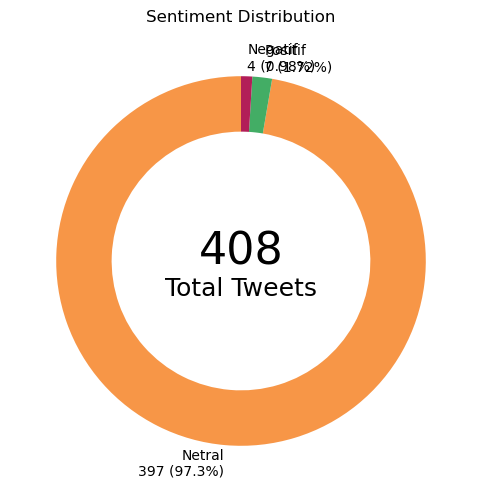

In [51]:
def plot_pie(data):

    pie_data = data.value_counts()
    color_map = {"positif": "#43AD65", "netral": "#F79647", "negatif": "#B21E58"}
    
    # Buat label
    labels = [
        (
            f"{str(pie_data.index[i]).title()}\n{pie_data.values[i]}"
            + f" ({round(pie_data.values[i] / sum(pie_data.values) * 100, 2)}%)"
        )
        for i in range(len(pie_data.values))
    ]

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        pie_data.values,
        labels=labels,
        colors=[color_map.get(str(x).lower(), "#cccccc") for x in pie_data.index],
        wedgeprops={"width": 0.3},
        startangle=90
    )

    # Informasi total
    plt.title("Sentiment Distribution", fontsize=12)
    plt.text(0, 0.05, sum(pie_data.values), ha="center", va="center", fontsize=32)
    plt.text(0, -0.15, "Total Tweets", ha="center", va="center", fontsize=18)
    plt.show()

plot_pie(df_clean["label"])

In [49]:
df_clean.sample(10)

,username,komentar,clean_comment,stem_comment,tokens,label
236,aigoo_watashi,Berkat ketidakbecusan Heru sekaligus terlalu m...,berkat ketidakbecusan heru manut jokowi warga ...,berkat ketidakbecusan heru manut jokowi warga ...,"[berkat, ketidakbecusan, heru, manut, jokowi, ...",netral
127,krriiss28,Dalam darah anies baswedan mengalir darah p.de...,darah anies baswedan mengalir darah pdemokrasi...,darah anies baswedan alir darah pdemokrasi ind...,"[darah, anies, baswedan, alir, darah, pdemokra...",netral
233,murdiono_ali,Kasihan deh pribumi Betawi cuma jadi penonton ...,kasihan deh pribumi betawi penonton terpinggirkan,kasihan deh pribumi betawi tonton pinggir,"[kasihan, deh, pribumi, betawi, tonton, pinggir]",netral
364,krisnapdwa,masih ada yang milih heru 😹,milih heru,milih heru,"[milih, heru]",netral
77,tyastyas91,Biasane kalo berita ginian RT 58 baru pada kel...,biasane kalo berita ginian rt,biasane kalo berita ginian rt,"[biasane, kalo, berita, ginian, rt]",netral
103,guchateu,Cukup tau aja😂,tau aja,tau aja,"[tau, aja]",netral
373,azwarwirman,Lah itu tukang pisang kok cuma 1%....,tukang pisang,tukang pisang,"[tukang, pisang]",netral
21,rakha_ruslan,Anies🔥🔥🔥,anies,anies,[anies],netral
264,handayaniwoke,Ahokkkk,ahokkkk,ahokkkk,[ahokkkk],netral
39,gracestedita,ahok sih,ahok sih,ahok sih,"[ahok, sih]",netral


### Save dataset|

In [ ]:
# Simpan file

df_clean.to_csv('./data_clean.csv', index=False) # data yang sudah bersih            